In [59]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [60]:
input_data_path = "C:\\Users\\Mud\\Desktop\\2ndPaper\\roi_data\\round_6\\[ROI]CF6.0_B01_N01.npy"
data = np.load(input_data_path)
print(data.shape)


critical_frames = [299, 449, 599]

(600, 21, 21)


In [61]:
def visualize_frames(data, prefix=""):
    for frame in critical_frames:
        plt.figure(figsize=(5, 5))

        img = data[frame]
        if img.ndim == 2:  # grayscale image
            plt.imshow(img, cmap='gray')
        elif img.ndim == 3 and img.shape[-1] == 3:  # RGB HxWx3
            if np.issubdtype(img.dtype, np.floating):
                img = np.clip(img, 0.0, 1.0)
            plt.imshow(img)
        
        plt.axis('off')
        plt.subplots_adjust(0, 0, 1, 1)
        # plt.show()
        plt.savefig(f"./vivit_frames/{prefix}_frame_{frame}.png", bbox_inches='tight', pad_inches=0, dpi=500)

In [62]:
def normalize_curve_mean_method1(input_data):
    mean = np.mean(input_data[:30])
    normalized_data = np.maximum(input_data - mean, 0)
    return normalized_data

normalized1 = normalize_curve_mean_method1(data)

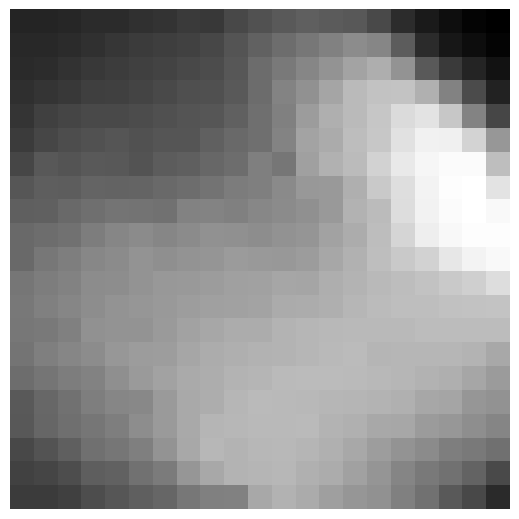

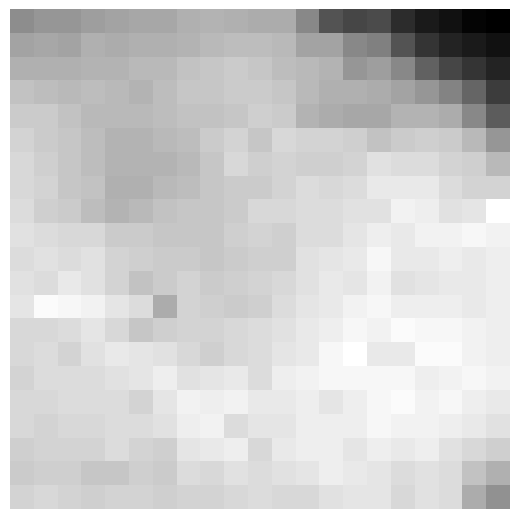

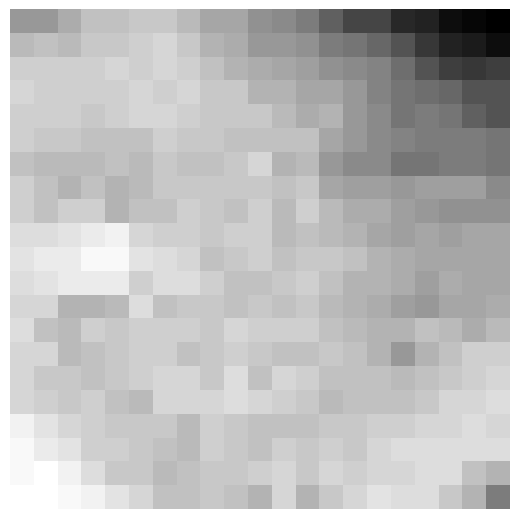

In [63]:
visualize_frames(data=normalized1, prefix="meannormed")

(600, 21, 21, 3)


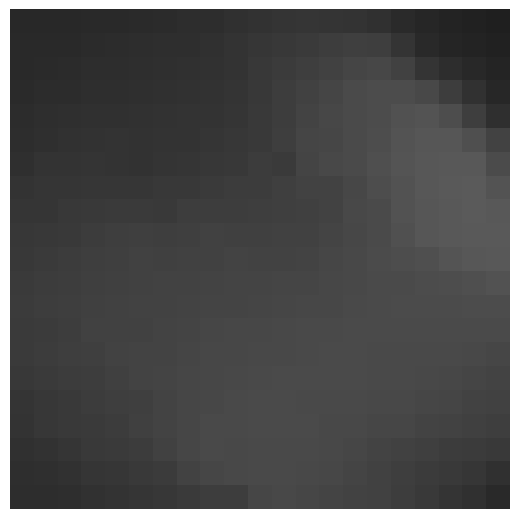

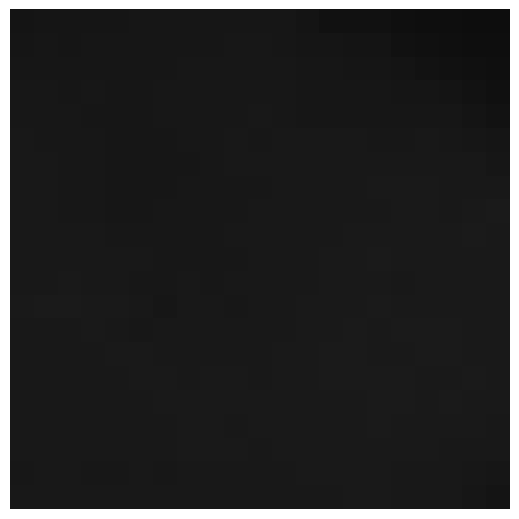

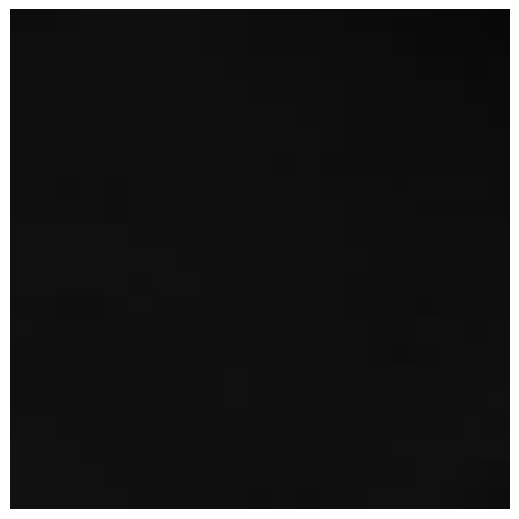

In [64]:
global_min = 0.0
global_max = 1132.3999999999996

normalized2 = ((normalized1 - global_min) / (global_max - global_min) * 255).astype(np.uint8)
rgb_video = np.stack([cv2.cvtColor(frame, cv2.COLOR_GRAY2RGB) for frame in normalized2], axis=0)
print(rgb_video.shape)
visualize_frames(rgb_video, prefix="rgb")

(600, 256, 256, 3)


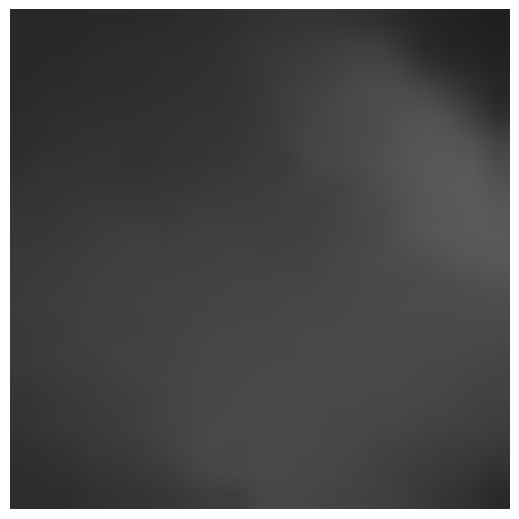

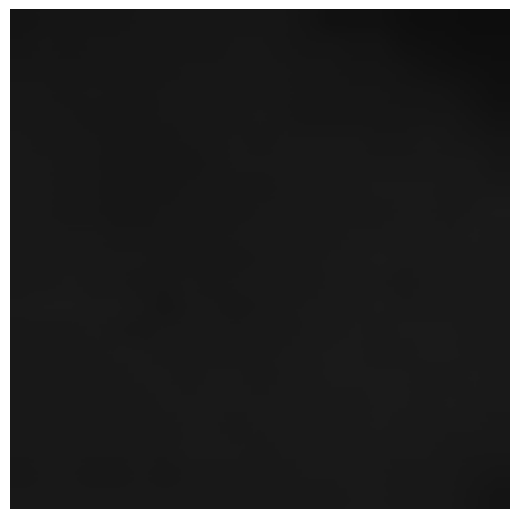

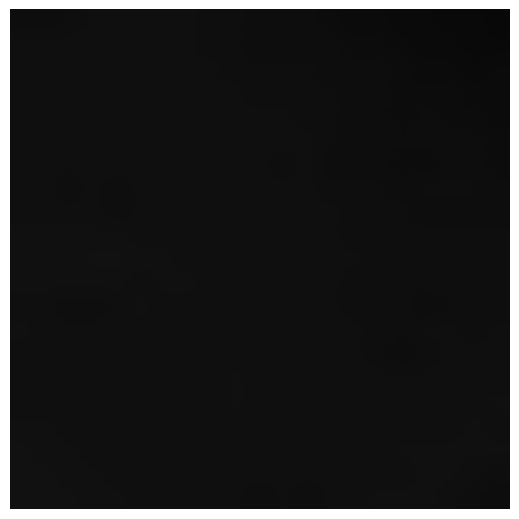

In [65]:
# resize frames to 256x256 using bilinear resampling
resized_video = np.array([cv2.resize(frame, (256, 256), interpolation=cv2.INTER_LINEAR) for frame in rgb_video])
print(resized_video.shape)
visualize_frames(resized_video, prefix="resized")